In [1]:
# Import
import os
import sys
import glob
import re

# Third-party
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

In [2]:
# Import dictionaries
sys.path.append('/home/users/benhutch/skill-maps')
import dictionaries as dict

# Import functions
import functions as func

# Import nao matching functions
sys.path.append('/home/users/benhutch/skill-maps/rose-suite-matching')
from nao_matching_seasons import match_variable_models, obs_path

In [3]:
# Set up the arguments for psl
psl_models = dict.models
obs_path_psl = dict.obs
base_dir = dict.base_dir
plots_dir = dict.plots_dir
save_dir = dict.save_dir
global_grid = dict.gridspec_global

# Set up the arguments for the matched variable (tas in this case)
matched_var_tas = 'tas'
region = 'global'
season = 'DJFM'
model_season = 'DJFM'
forecast_range = '2-9'
start_year = '1960'
end_year = '2022'
lag = 4
no_subset_members = 20


In [4]:
# Set up the models for the matched variable
match_var_models_tas = match_variable_models(matched_var_tas)

match_var: tas


In [5]:
# Set up the observations for the matched variable
obs_path_tas = obs_path(matched_var_tas)

In [6]:
# Process the global psl anomalies to be used for the NAO index
obs_psl_anom = func.read_obs('psl', region, forecast_range, season,
                                obs_path_psl, start_year, end_year)

/opt/jaspy/lib/python3.10/site-packages/iris/coords.py:2220: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'time'.
  warnings.warn(msg.format(self.name()))


Time dimension of obs: ['1960-12-31T00:00:00.000000000' '1961-12-31T00:00:00.000000000'
 '1962-12-31T00:00:00.000000000' '1963-12-31T00:00:00.000000000'
 '1964-12-31T00:00:00.000000000' '1965-12-31T00:00:00.000000000'
 '1966-12-31T00:00:00.000000000' '1967-12-31T00:00:00.000000000'
 '1968-12-31T00:00:00.000000000' '1969-12-31T00:00:00.000000000'
 '1970-12-31T00:00:00.000000000' '1971-12-31T00:00:00.000000000'
 '1972-12-31T00:00:00.000000000' '1973-12-31T00:00:00.000000000'
 '1974-12-31T00:00:00.000000000' '1975-12-31T00:00:00.000000000'
 '1976-12-31T00:00:00.000000000' '1977-12-31T00:00:00.000000000'
 '1978-12-31T00:00:00.000000000' '1979-12-31T00:00:00.000000000'
 '1980-12-31T00:00:00.000000000' '1981-12-31T00:00:00.000000000'
 '1982-12-31T00:00:00.000000000' '1983-12-31T00:00:00.000000000'
 '1984-12-31T00:00:00.000000000' '1985-12-31T00:00:00.000000000'
 '1986-12-31T00:00:00.000000000' '1987-12-31T00:00:00.000000000'
 '1988-12-31T00:00:00.000000000' '1989-12-31T00:00:00.000000000'
 '

In [7]:
# Alternative method of processing the global psl anomalies
# for the obs
obs_psl_anom_alt = func.process_observations('psl', region,
                                                global_grid, 
                                                forecast_range,
                                                season, obs_path_psl,
                                                'psl')

Gridspec file: /home/users/benhutch/gridspec/gridspec-global.txt
Variable is not ua or va, creating new file name
File already exists
Loading ERA5 data
Dataset loaded:  [[[[100441.25  100441.25  100441.25  ... 100441.25  100441.25
    100441.25 ]
   [ 99956.96   99949.89   99938.24  ... 100008.12   99992.734
     99973.734]
   [ 99372.84   99429.414  99346.5   ...  99315.445  99202.03
     99230.18 ]
   ...
   [103048.07  103076.63  103104.36  ... 102961.27  102991.36
    103020.336]
   [102941.17  102960.586 102981.38  ... 102875.04  102897.77
    102917.19 ]
   [102773.83  102784.78  102795.32  ... 102740.555 102752.75
    102763.43 ]]

  [[       nan        nan        nan ...        nan        nan
           nan]
   [       nan        nan        nan ...        nan        nan
           nan]
   [       nan        nan        nan ...        nan        nan
           nan]
   ...
   [       nan        nan        nan ...        nan        nan
           nan]
   [       nan        nan     

In [8]:
# Load and process the model psl anomalies to be used for the NAO index
model_datasets_psl = func.load_data(base_dir, psl_models, 'psl', region,
                                        forecast_range, season)

# Process the model psl anomalies to be used for the NAO index
model_data_psl, _ = func.process_data(model_datasets_psl, 'psl')

Skipping file /home/users/benhutch/skill-maps-processed-data/psl/EC-Earth3/global/years_2-9/DJFM/outputs/mergetime/mergetime_EC-Earth3_psl_global_2-9_DJFM-r7i2.nc
Skipping file /home/users/benhutch/skill-maps-processed-data/psl/EC-Earth3/global/years_2-9/DJFM/outputs/mergetime/mergetime_EC-Earth3_psl_global_2-9_DJFM-r6i2.nc
Skipping file /home/users/benhutch/skill-maps-processed-data/psl/EC-Earth3/global/years_2-9/DJFM/outputs/mergetime/mergetime_EC-Earth3_psl_global_2-9_DJFM-r9i2.nc
Skipping file /home/users/benhutch/skill-maps-processed-data/psl/EC-Earth3/global/years_2-9/DJFM/outputs/mergetime/mergetime_EC-Earth3_psl_global_2-9_DJFM-r8i2.nc
Skipping file /home/users/benhutch/skill-maps-processed-data/psl/EC-Earth3/global/years_2-9/DJFM/outputs/mergetime/mergetime_EC-Earth3_psl_global_2-9_DJFM-r10i2.nc
Skipping file /home/users/benhutch/skill-maps-processed-data/psl/FGOALS-f3-L/global/years_2-9/DJFM/outputs/mergetime/mergetime_FGOALS-f3-L_psl_global_2-9_DJFM-r3i1.nc
Skipping file /ho

In [9]:
# Make sure that the models contain the same time periods for psl
model_data_psl = func.constrain_years(model_data_psl, psl_models)

There is a gap of more than 1 year in the years for model CanESM5member r3i1p2f1
There is a gap of more than 1 year in the years for model CanESM5member r19i1p2f1
There is a gap of more than 1 year in the years for model CanESM5member r15i1p2f1
There is a gap of more than 1 year in the years for model CanESM5member r1i1p2f1
There is a gap of more than 1 year in the years for model CanESM5member r18i1p2f1
There is a gap of more than 1 year in the years for model CanESM5member r10i1p2f1
There is a gap of more than 1 year in the years for model CanESM5member r13i1p2f1
There is a gap of more than 1 year in the years for model CanESM5member r3i1p2f1
adjusted indices: 54
years where gap is greater than 1: [2019 2020 2021 2023 2024]
There is a gap of more than 1 year in the years for model CanESM5member r19i1p2f1
adjusted indices: 54
years where gap is greater than 1: [2019 2020 2021 2023 2024]
There is a gap of more than 1 year in the years for model CanESM5member r15i1p2f1
adjusted indices:

In [10]:
# Remove years containing NaNs from the obs and model data
obs_psl_anom, model_data_psl, _ = \
                            func.remove_years_with_nans_nao(obs_psl_anom,
                                                                model_data_psl,
                                                                psl_models)

# Do the same for the alternative method of processing the global psl anomalies
obs_psl_anom_alt, model_data_psl_alt, _ = \
                            func.remove_years_with_nans_nao(obs_psl_anom_alt,
                                                                model_data_psl,
                                                                psl_models)

No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
1960 all NaN values for this year
1961 all NaN values for this year
1962 all NaN values for this year
1963 all NaN values for this year
1964 no NaN values for this year
1965 no NaN values for this year
1966 no NaN values for this year
1967 no NaN values for this year
1968 no NaN values for this year
1969 no NaN values for this year
1970 no NaN values for this year
1971 no NaN values for this year
1972 no NaN values for this year
1973 no NaN values for this year
1974 no NaN values for this year
1975 no NaN values for this year
1976 no NaN values for this year
1977 no NaN values for this year
1978 no NaN values

Calculating NAO index using standard definition
Calculating model NAO index using default definition
calculated NAO for model BCC-CSM2-MR member r3i1p1f1
Calculating model NAO index using default definition
calculated NAO for model BCC-CSM2-MR member r7i1p1f1
Calculating model NAO index using default definition
calculated NAO for model BCC-CSM2-MR member r6i1p1f1
Calculating model NAO index using default definition
calculated NAO for model BCC-CSM2-MR member r4i1p1f1
Calculating model NAO index using default definition
calculated NAO for model BCC-CSM2-MR member r2i1p1f1
Calculating model NAO index using default definition
calculated NAO for model BCC-CSM2-MR member r8i1p1f1
Calculating model NAO index using default definition
calculated NAO for model BCC-CSM2-MR member r5i1p1f1
Calculating model NAO index using default definition
calculated NAO for model BCC-CSM2-MR member r1i1p1f1
Calculating model NAO index using default definition
calculated NAO for model MPI-ESM1-2-HR member r1i1p

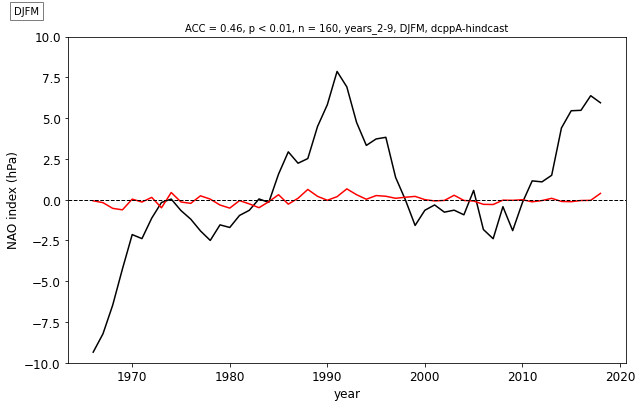

In [13]:
# Calculate the NAO index for the obs and model psl data
obs_nao, model_nao = func.calculate_nao_index_and_plot(obs_psl_anom, 
                                                        model_data_psl,
                                                        psl_models,
                                                        'psl',
                                                        season,
                                                        forecast_range,
                                                        plots_dir,
                                                        plot_graphics=True,
                                                        azores_grid = dict.azores_grid_corrected,
                                                        iceland_grid = dict.iceland_grid_corrected)

Calculating NAO index using standard definition
Calculating model NAO index using default definition
calculated NAO for model BCC-CSM2-MR member r3i1p1f1
Calculating model NAO index using default definition
calculated NAO for model BCC-CSM2-MR member r7i1p1f1
Calculating model NAO index using default definition
calculated NAO for model BCC-CSM2-MR member r6i1p1f1
Calculating model NAO index using default definition
calculated NAO for model BCC-CSM2-MR member r4i1p1f1
Calculating model NAO index using default definition
calculated NAO for model BCC-CSM2-MR member r2i1p1f1
Calculating model NAO index using default definition
calculated NAO for model BCC-CSM2-MR member r8i1p1f1
Calculating model NAO index using default definition
calculated NAO for model BCC-CSM2-MR member r5i1p1f1
Calculating model NAO index using default definition
calculated NAO for model BCC-CSM2-MR member r1i1p1f1
Calculating model NAO index using default definition
calculated NAO for model MPI-ESM1-2-HR member r1i1p

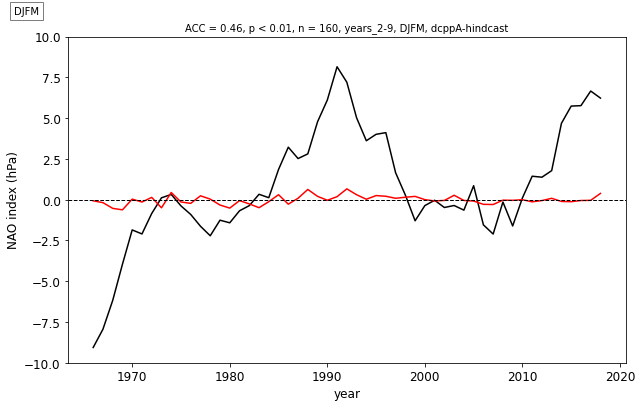

In [15]:
# Do the same for the alternative method of processing the global psl anomalies
obs_nao_alt, model_nao_alt = func.calculate_nao_index_and_plot(obs_psl_anom_alt, 
                                                        model_data_psl_alt,
                                                        psl_models,
                                                        'psl',
                                                        season,
                                                        forecast_range,
                                                        plots_dir,
                                                        plot_graphics = True,       
                                                        azores_grid = dict.azores_grid_corrected,
                                                        iceland_grid = dict.iceland_grid_corrected)